# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [24]:
# Load pickled data
import pickle

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [25]:
### Replace each question mark with the appropriate value.
import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

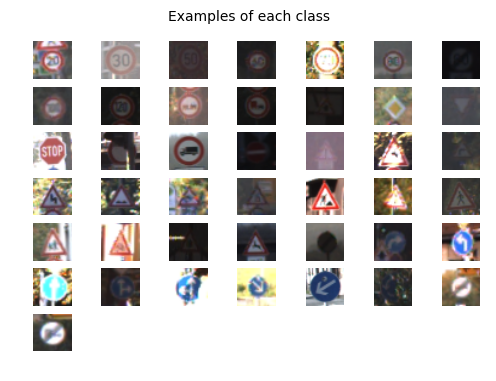

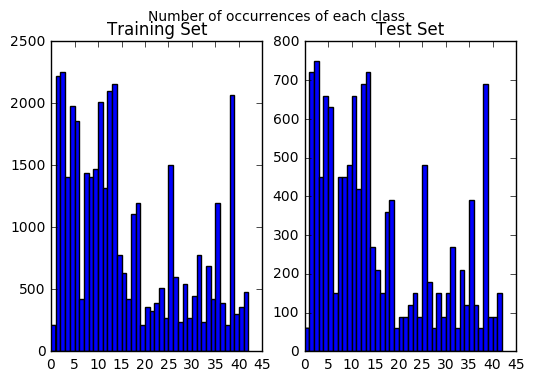

In [26]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure().suptitle('Examples of each class')
cols = 7
rows = n_classes/cols + 1
for label in range(n_classes):
    first_index = np.argwhere(y_train==label)[0][0]
    first_img = X_train[first_index,:,:,:]
    plt.subplot(rows, cols, label+1)
    plt.imshow(first_img)
    plt.axis('off')

plt.figure().suptitle('Number of occurrences of each class')
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=range(n_classes))
p = plt.title('Training Set')
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=range(n_classes))
p = plt.title('Test Set')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [27]:
### Preprocess the data here.
import numpy as np
import sklearn.preprocessing
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

def ExtractY(X_data):
    '''
    Extract the Y colorplane from the data
    see https://en.wikipedia.org/wiki/YUV
    '''
    shape = X_data.shape
    Wr = 0.299
    Wg = 0.587
    Wb = 0.114
    return np.dot(X_data, [Wr, Wg, Wb]).astype('float32').reshape((shape[0], shape[1], shape[2], 1))

def GlobalNorm(X_data):
    '''
    Center the data of each image around its mean and scale to (-1, 1)
    '''
    X_data = X_data - np.mean(X_data, (1,2), keepdims=True)
    X_maxabs = np.max(np.abs(X_data), (1,2), keepdims=True)
    return X_data / X_maxabs

def PreProcess(X_data):
    X_data = ExtractY(X_data)
    X_data = GlobalNorm(X_data)
    return X_data.astype('float32')

# TODO: Local normalization to emphasize edges

X_train = PreProcess(X_train)
X_test = PreProcess(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

My preprocessing method is a simplified version of the preprocessing technique used in the Sermanet/LeCun baseline model. Sermanet and LeCun found that the luminance componenet of the YUV colorspace worked better than using multiple channels as input to their network. They also regularized their image with global normalization (to minimize disparity between images due to lighting/exposure) and local normalization (to emphasize edges in the luminance image).

To simplify this implementation, I did not perform local normalization, only luminance calculation and global normalization. I find that my accuracy (98.9% accuracy on the validation set after 10 epochs) is still similar to the Sermanet/LeCun results (99.17% accuracy).

In [28]:
### Split the data (use stratify to enforce uniform sampling)
try:
    from sklearn.model_selection import train_test_split
except ImportError:
    from sklearn.cross_validation import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I split the training data into training and validation sets. The validation set is 20% of the training data, split using SciKit Learn's `train_test_split()` function. I used the `stratify` option to guarantee that the validation set had the same composition (ratios of classes) as the overall training set.

I chose not to generate additional data because I felt that the training set was large enough without creating artificial data. Had I chosen to create more data, I would have used translation, rotation, and scaling to create modified versions of the existing sign images.

In [29]:
### Define your architecture here.
import tensorflow as tf
### Feel free to use as many code cells as needed.

def ConvolutionalFilter(name, input, shape, mu, sigma, strides=[1,1,1,1], padding='VALID'):
    with tf.name_scope(name):
        weights = tf.Variable(tf.truncated_normal(shape=shape, mean = mu, stddev = sigma), name='W')
        bias = tf.Variable(tf.zeros(shape[3]), name='b')
        logits = tf.nn.conv2d(input, weights, strides=strides, padding=padding)
        output = tf.nn.relu(logits)
        return output

def FullyConvolutionalLayer(name, input, output_size, mu, stddev, return_logits):
    input_size = input.get_shape().as_list()[1]
    with tf.name_scope(name):
        weights = tf.Variable(tf.truncated_normal(shape=(input_size, output_size), mean = mu, stddev = sigma), name='W')
        bias = tf.Variable(tf.zeros(output_size), name='b')
        logits = tf.matmul(input, weights) + b
        if return_logits:
            return logits
        else:
            output = tf.nn.relu(logits)
            return output

def SquareMaxPool(name, input, size, padding='VALID'):
    with tf.name_scope(name):
        pooled = tf.nn.max_pool(input, ksize=[1, size, size, 1], strides=[1, size, size, 1], padding = padding)
    return pooled
        
def MyNetwork(x, mu=0, sigma=0.1):
    # Layer 1: Convolutional. Input = 32x32x1. Output = 20x20x108.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(13, 13, 1, 108), mean = mu, stddev = sigma), name='W1')
    conv1_b = tf.Variable(tf.zeros(108), name='b1')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation
    conv1   = tf.nn.relu(conv1)
    # Max pooling. Output = 10 x 10 x 108
    conv1   = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Input = 10x10x108. Output = 10x10x8640
    conv2_W = tf.Variable(tf.truncated_normal(shape=(1,1,108,8640), mean = mu, stddev = sigma), name='W2')
    conv2_b = tf.Variable(tf.zeros(8640), name='b2')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation
    conv2   = tf.nn.relu(conv2)
    # Max pooling. Output = 5 x 5 x 8640
    conv2   = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Max pooling on 1st layer. Output = 5 x 5 x 108
    conv1_pool2 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten and concatenate layers
    conv2_flat = tf.contrib.layers.flatten(conv2)
    conv1_pool2_flat = tf.contrib.layers.flatten(conv1_pool2)
    fc0   = tf.concat(1,[conv2_flat, conv1_pool2_flat])
    size = fc0.get_shape().as_list()[1]
    
    # Fully convolutional hidden layer, 100 hidden neurons
    fc1_W = tf.Variable(tf.truncated_normal(shape=(size, 100), mean = mu, stddev = sigma), name='F1W')
    fc1_b = tf.Variable(tf.zeros(100), name='F1b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1   = tf.nn.relu(fc1)

    # Output layer, 43 classes
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma), name='F2W')
    fc2_b  = tf.Variable(tf.zeros(43), name='F2b')
    logits = tf.matmul(fc1, fc2_W) + fc2_b    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My architecture is based heavily on the Sermanet/LeCun architecture. Their performance (99.17%) on the task was hard to beat. The archictecture resembles LeNet but with a few key differences. First, the Sermanet/LeCun architecture has only one fully convolutional hidden layer, which makes for fewer parameters than LeNet for that part of the network. The bigger difference, however, is that this architecture feeds the features from the first layer forward into the fully convolutional layer. This "split-merge" approach, called "Multi-Scale Features" in the Sermanet/LeCun paper, allows the network to activate on both local (first stage) and global (second stage) features. This network is also very large compared to LeNet, with 108 first-stage filters and 8640 second stage filters. If I were to improve this model further, I would want to try to reduce its size so that it can run in less memory.

In [30]:
### From LeNet Solution:
import tensorflow as tf

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [31]:
### From LeNet Solution:
import tensorflow as tf
from sklearn.utils import shuffle
### From LeNet Solution:
import tensorflow as tf

# Parameters for Adam Optimizer. See https://arxiv.org/pdf/1412.6980.pdf
ALPHA = 0.001

logits = MyNetwork(x, sigma=0.01)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data, sess=None):
    num_examples = len(X_data)
    total_accuracy = 0
    if sess is None:
        sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = ALPHA)
training_operation = optimizer.minimize(loss_operation, name='ADAM')

In [62]:
import os.path

REINITIALIZE = True
LOAD = False
EPOCHS = 10
BATCH_SIZE = 128
checkpoint_path = 'mynet.ckpt'
if not os.path.isabs(checkpoint_path):
    checkpoint_path = os.path.abspath(checkpoint_path)

saver = tf.train.Saver()

if REINITIALIZE:
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    print("Model reinitialized")
elif LOAD:
    saver.restore(sess, checkpoint_path)
    print("Model restored")
    
print("Training...")
for i in range(EPOCHS):
    X_train, y_train = shuffle(X_train, y_train)
    num_examples = len(X_train)
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

    validation_accuracy = evaluate(X_validation, y_validation, sess)
    print("EPOCH {} ... Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
saver.save(sess, checkpoint_path)
print("Model saved")

Model reinitialized
Training...
EPOCH 1 ... Validation Accuracy = 0.944
EPOCH 2 ... Validation Accuracy = 0.972
EPOCH 3 ... Validation Accuracy = 0.977
EPOCH 4 ... Validation Accuracy = 0.977
EPOCH 5 ... Validation Accuracy = 0.987
EPOCH 6 ... Validation Accuracy = 0.974
EPOCH 7 ... Validation Accuracy = 0.979
EPOCH 8 ... Validation Accuracy = 0.989
EPOCH 9 ... Validation Accuracy = 0.981
EPOCH 10 ... Validation Accuracy = 0.988
Model saved


In [66]:
# Try model on test set
# Only run this cell when you're ready to commit to a model
import tensorflow as tf

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, checkpoint_path)
    test_accuracy = evaluate(X_test, y_test)
print("Test accuracy = {:.3f}".format(test_accuracy))

Test accuracy = 0.927


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I trained my model using the Adam optimizer. I experimented with learning rates; higher rates (0.005 and 0.01) could not achieve accuracy as high as the default learning rate (0.001) and did not converge noticeably faster. I trained my model for 10 epochs, but the majority of the improvement comes in the first 5 epochs or so. After that point, the accuracy may go down slightly, oscillating around. The batch size (128) was chosen based on my training hardware, an Amazon EC2 g2.8xlarge instance. I did not attempt to optimize batch size for the hardware--I may have been able to increase it to speed up training.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

My approach was to take a known-successful approach, the Sermanet/LeCun solution, and implement it, using trial and error to determine whether my departures from their method were acceptable. Notably, I chose not to implement local normalization for preprocessing. I tried this, and found that the results were similar to theirs, so I decided to leave it out. After any change to my pipeline, I validated my pipeline by retraining from scratch and checking that I still achieved at least 97% accuracy. Without a specific accuracy target or requirements specification for the project, I chose this as an acceptance metric. Originally, I planned to use the Sermanet/LeCun implementation as a baseline, and then improve it incrementally, but I was surprised by how well my first implementation worked. My final network is the same as my initial implementation of their preprocessing and network, but with some tweaks to the learning rate and some cleanup to my code.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

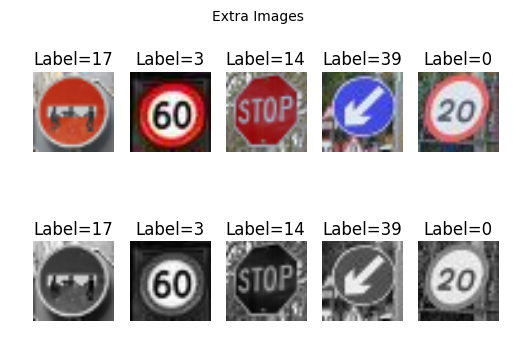

In [45]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
import os
import scipy.ndimage
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
sign_files = os.listdir('signs')
X_extra = list()
y_extra = list()
for file_name in sign_files:
    label = int(file_name.split('.')[0])
    img = scipy.ndimage.imread('signs/' + file_name, mode='RGB')
    X_extra.append(img)
    y_extra.append(label)
X_extra = np.stack(X_extra)
y_extra = np.array(y_extra)

plt.figure().suptitle('Extra Images')
for i in range(len(y_extra)):
    first_img = X_extra[i,:,:,:]
    plt.subplot(2, 5, i+1)
    plt.title("Label={}".format(y_extra[i]))
    plt.imshow(first_img)
    plt.axis('off')

X_extra_preprocess = PreProcess(X_extra)

for i in range(len(y_extra)):
    first_img = X_extra_preprocess[i,:,:,:]
    plt.subplot(2, 5, i+6)
    plt.title("Label={}".format(y_extra[i]))
    plt.imshow(np.squeeze(first_img), cmap='gray')
    plt.axis('off')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Although most of these images are straight-forward, well lit images, the first image (labeled 17) may pose a problem because it has been rather amusingly graffitied to depict a bar scene. The last image (labeled 0) is skewed, which may cause difficulty.

In [63]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

label = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, os.path.abspath('mynet.ckpt'))
    labels = sess.run(label, feed_dict={x: X_extra_preprocess})
print(labels)

[17  3 14 39  1]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My model was able to correctly classify 4 out of 5 images (80%).

In [64]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
k = 5
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k)

with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, os.path.abspath('mynet.ckpt'))
    top = sess.run(top_k, feed_dict={x: X_extra_preprocess})
for i in range(5):
    print("True label={}".format(y_extra[i]))
    for j in range(k):
        print("{}: {:.3f}%".format(top.indices[i][j], 100*top.values[i][j]))
    print("\n")

True label=17
17: 74.444%
34: 21.306%
33: 4.247%
14: 0.002%
35: 0.000%


True label=3
3: 100.000%
2: 0.000%
5: 0.000%
6: 0.000%
36: 0.000%


True label=14
14: 100.000%
13: 0.000%
4: 0.000%
17: 0.000%
15: 0.000%


True label=39
39: 82.555%
1: 10.922%
31: 3.696%
24: 1.702%
2: 1.116%


True label=0
1: 73.598%
0: 25.383%
4: 0.822%
12: 0.118%
40: 0.069%




### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

My model was fairly uncertain on the first sign (the graffitied sign) and the last sign (the one it classified incorrectly). The last sign has the correct prediction as the number two choice, with a 25.4% probability. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.